## GRAPPA reconstruction 
###### Author: Zimu Huo
###### Date: 02.2022


This has the same sampling scheme as SENSE, so it is a more generalised version. Thus, the slice data and reference data are separated. siemens: "sep"

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: Generalized Autocalibrating Partially Parallel Acquisitions (GRAPPA)
    Link: https://pubmed.ncbi.nlm.nih.gov/12111967/
    

In [2]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
from util.grappa import *

In [3]:
indSlice = np.asarray([2], dtype = int)
numSlice = len(indSlice)
R = 2
from util.twix import *
file_sms = "../lib/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,0]
rawImage = ifft2c(data)
acs = simulate.acs(data, (32, 32))
dataR = np.zeros(data.shape, dtype = complex)
dataR[::R] = data[::R]

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 2 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


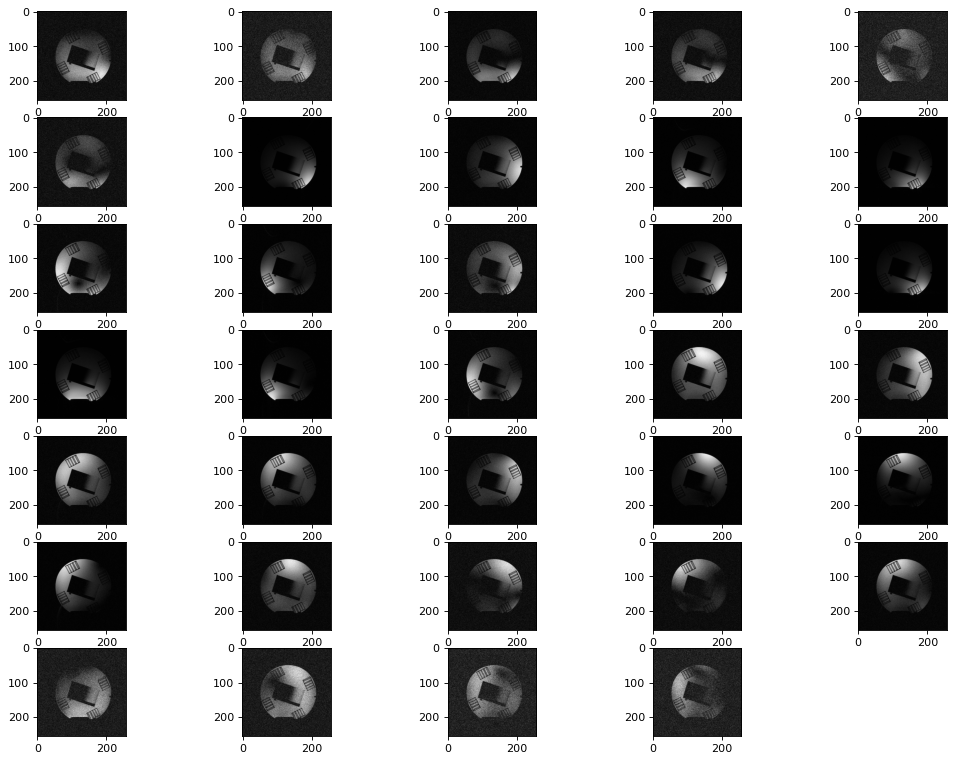

In [4]:
show(ifft2c(data))

In [ ]:
recon = grappa(dataR, acs, method = "mul")

In [ ]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(121)
plt.imshow(np.abs(rsos(ifft2c(dataR))),cmap='gray')
plt.title("Aliased image R = "+str(R))
plt.subplot(122)
plt.imshow(np.abs((recon)),cmap='gray')
plt.title("Reconstructed GRAPPA")
plt.show()